In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from collections import Counter

## 데이터 구조 파악 및 결측치 제거 

In [3]:
df = pd.read_csv('C:/study_data/bigdata/[DACON]235745_parking_data/train.csv')
df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [4]:
df.describe()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2952.000000,2952.000000,2952.000000,2952.000000,2741.000000,2948.000000,2952.000000,2952.000000
mean,886.661247,44.757215,102.747967,12.921070,0.176578,3.695726,601.668360,559.768293
std,513.540168,31.874280,132.640159,10.778831,0.427408,2.644665,396.407072,433.375027
min,26.000000,12.620000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000
25%,513.500000,32.100000,14.000000,4.000000,0.000000,2.000000,279.250000,220.000000
50%,779.000000,39.930000,60.000000,11.000000,0.000000,3.000000,517.000000,487.000000
75%,1106.000000,51.562500,144.000000,20.000000,0.000000,4.000000,823.000000,770.000000
max,2568.000000,583.400000,1865.000000,55.000000,3.000000,20.000000,1798.000000,2550.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [6]:
df['임대보증금'] = pd.to_numeric(df['임대보증금'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2371 non-null   float64
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [7]:
df['임대료'] = pd.to_numeric(df['임대료'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2371 non-null   float64
 10  임대료                           2362 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [8]:
df['임대료'].replace(',','.')

0       103680.0
1       103680.0
2       184330.0
3       184330.0
4       184330.0
          ...   
2947    116090.0
2948    142310.0
2949    142310.0
2950    142310.0
2951    151030.0
Name: 임대료, Length: 2952, dtype: float64

In [9]:
# df["임대료"] = df["임대료"].apply(pd.to_numeric)
# df["임대보증금"] = df["임대보증금"].apply(pd.to_numeric)

In [10]:
null_im_df = df['임대료'].isnull()
null_im_df = df[null_im_df]
display(null_im_df)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0


In [11]:
df = df.dropna(axis=0)
df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0


In [12]:
df = df.reset_index(drop=True)
df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0
2281,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2282,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2283,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0


In [13]:
# 임대보증금과 임대료는 숫자로 써있지만 object타입으로 되어있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2285 non-null   object 
 1   총세대수                          2285 non-null   int64  
 2   임대건물구분                        2285 non-null   object 
 3   지역                            2285 non-null   object 
 4   공급유형                          2285 non-null   object 
 5   전용면적                          2285 non-null   float64
 6   전용면적별세대수                      2285 non-null   int64  
 7   공가수                           2285 non-null   float64
 8   자격유형                          2285 non-null   object 
 9   임대보증금                         2285 non-null   float64
 10  임대료                           2285 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2285 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2285 non-null   float64
 13  단지내

In [14]:
df['임대보증금']

0       15667000.0
1       15667000.0
2       27304000.0
3       27304000.0
4       27304000.0
           ...    
2280    11346000.0
2281    14005000.0
2282    14005000.0
2283    14005000.0
2284    14830000.0
Name: 임대보증금, Length: 2285, dtype: float64

## column 별로 분석

### 단지코드 분석

In [15]:
# 중복 되지 않는 단지 코드의 수
df['단지코드'].nunique()

401

In [16]:
# 가장 많은 단지 코드의 수
df['단지코드'].value_counts()

C2051    23
C2538    19
C2507    18
C2506    17
C1177    16
         ..
C2188     1
C2571     1
C2340     1
C2437     1
C1786     1
Name: 단지코드, Length: 401, dtype: int64

### 총세대수 분석

In [17]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2285 non-null   object 
 1   총세대수                          2285 non-null   int64  
 2   임대건물구분                        2285 non-null   object 
 3   지역                            2285 non-null   object 
 4   공급유형                          2285 non-null   object 
 5   전용면적                          2285 non-null   float64
 6   전용면적별세대수                      2285 non-null   int64  
 7   공가수                           2285 non-null   float64
 8   자격유형                          2285 non-null   object 
 9   임대보증금                         2285 non-null   float64
 10  임대료                           2285 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2285 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2285 non-null   float64
 13  단지내

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0


In [18]:
# 총세대수를 describe를 사용해서 기본적인 연산들을 파악한다.
df['총세대수'].describe()

count    2285.000000
mean      796.922538
std       433.373356
min        26.000000
25%       492.000000
50%       720.000000
75%      1006.000000
max      2568.000000
Name: 총세대수, dtype: float64

### 임대건물구분 분석

In [19]:
fred3 = df['임대건물구분']
fred3.value_counts()

# 아파트: 2390개 / 상가: 562개

아파트    2285
Name: 임대건물구분, dtype: int64

In [20]:
# fred3은 3번째 column의 분석이고 각 아파트와 상가를 구분해서 fred_apart와 fred_store로 나눈다.
fred3_apart = df['임대건물구분'] == '아파트'
fred3_apart = df[fred3_apart]
fred3_store = df['임대건물구분'] == '상가'
fred3_store = df[fred3_store]

fred3_store

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


### 지역 분석

In [21]:
df['지역'].unique()

array(['경상북도', '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '부산광역시',
       '제주특별자치도', '울산광역시', '충청북도', '전라남도', '충청남도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [22]:
# 수집한 지역의 건수가 얼마나 있는지 확인
df['지역'].value_counts()

경기도        621
경상남도       268
충청북도       163
강원도        152
전라남도       151
광주광역시      141
경상북도       119
대전광역시      111
전라북도       109
부산광역시      103
대구광역시       99
제주특별자치도     66
서울특별시       55
세종특별자치시     47
충청남도        44
울산광역시       36
Name: 지역, dtype: int64

### 공급유형 분석

In [23]:
# 수집한 데이터에 공급유형이 
df['공급유형'].value_counts()

국민임대         1719
행복주택          209
공공임대(10년)     198
영구임대          127
공공임대(50년)      20
공공임대(분납)        9
공공임대(5년)        3
Name: 공급유형, dtype: int64

### 전용면적 분석

In [24]:
df['전용면적'].describe()

count    2285.000000
mean       44.605217
std        13.104544
min        16.020000
25%        36.640000
50%        46.610000
75%        51.830000
max        84.990000
Name: 전용면적, dtype: float64

In [25]:
# 데이터의 describe를 확인해본 결과 max값과 mean또는 min값이 괴리감이 크기 때문에 이를 확인해보니 큰 면적의 아파트는 공공임대가 주축이다.
fred6 = df
fred6 = fred6.sort_values(['전용면적'], ascending=False)
fred6.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1344,C1344,424,아파트,서울특별시,공공임대(분납),84.99,100,0.0,A,142744000.0,361800.0,0.0,3.0,467.0,509.0
2013,C1697,526,아파트,경기도,공공임대(10년),84.99,188,4.0,A,75000000.0,390000.0,0.0,3.0,727.0,854.0
2019,C2259,947,아파트,경기도,공공임대(10년),84.99,290,5.0,A,75000000.0,390000.0,0.0,2.0,1306.0,1378.0
1891,C1941,404,아파트,경상남도,공공임대(10년),84.99,252,19.0,A,47288000.0,627080.0,0.0,3.0,490.0,600.0
1985,C2595,867,아파트,경상남도,공공임대(10년),84.98,8,2.0,A,54000000.0,620000.0,0.0,5.0,897.0,1359.0
1807,C1636,632,아파트,경기도,공공임대(10년),84.98,382,7.0,A,79500000.0,630000.0,0.0,20.0,750.0,946.0
1424,C1804,478,아파트,경기도,공공임대(10년),84.98,3,3.0,A,90237000.0,597820.0,0.0,3.0,629.0,951.0
2129,C1756,404,아파트,울산광역시,공공임대(10년),84.98,49,1.0,A,55000000.0,620000.0,0.0,3.0,486.0,609.0
2118,C1544,442,아파트,대구광역시,공공임대(10년),84.98,215,10.0,A,53000000.0,490000.0,0.0,2.0,533.0,713.0
1550,C1740,783,아파트,경상북도,공공임대(10년),84.98,78,29.0,A,46000000.0,580000.0,0.0,6.0,978.0,979.0


### 공가수 분석

In [26]:
df['공가수'].describe()

count    2285.000000
mean       14.338731
std        10.510062
min         0.000000
25%         7.000000
50%        13.000000
75%        21.000000
max        55.000000
Name: 공가수, dtype: float64

In [27]:
# 대체적으로 40이상의 공가수는 15개 아파트가 채 안된다. 현재 아파트의 공가수가 크게 여유있는 편이 아닌것같다. 즉 대량의 이사가 많이 일어나는 편은 아니다.
df['공가수'].value_counts()

13.0    214
7.0     191
2.0     114
4.0     101
9.0      94
15.0     93
16.0     93
21.0     93
10.0     89
1.0      85
0.0      85
14.0     84
3.0      76
17.0     70
8.0      58
22.0     54
28.0     52
20.0     48
19.0     47
6.0      38
23.0     37
26.0     37
12.0     36
29.0     36
32.0     35
18.0     32
24.0     31
5.0      28
11.0     28
25.0     23
27.0     20
30.0     19
36.0     18
46.0     14
38.0     13
31.0     13
33.0     12
40.0     11
37.0     11
49.0      9
47.0      8
39.0      8
55.0      8
34.0      7
41.0      4
42.0      4
35.0      4
Name: 공가수, dtype: int64

### 자격유형 분류

In [28]:
df['자격유형'].value_counts()

A    1740
H     147
J     114
C      76
I      44
E      36
L      33
N      30
K      29
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [29]:
def Qualification_type(type):
    fred9_type = df['자격유형'] == type
    fred9_type = df[fred9_type]

    return fred9_type

def print_fred9(fred9_type):

    return fred9_type.head(3)

fred9_A = Qualification_type('A')
fred9_B = Qualification_type('B')
fred9_C = Qualification_type('C')
fred9_F = Qualification_type('F')
fred9_E = Qualification_type('E')
fred9_G = Qualification_type('G')
fred9_H = Qualification_type('H')
fred9_I = Qualification_type('I')
fred9_J = Qualification_type('J')
fred9_L = Qualification_type('L')
fred9_M = Qualification_type('M')
fred9_N = Qualification_type('N')
fred9_O = Qualification_type('O')


# fred9_A
# fred9_B
# fred9_C
# fred9_F
# fred9_E
# fred9_G
# fred9_H
# fred9_I
# fred9_J
# fred9_L
# fred9_M
# fred9_N
# fred9_O


#  각 자기 유형별을 어떤 식으로 나눠야 할 지 모르겠다. 어떠한 패턴을 확인할 수 있는지 고민중

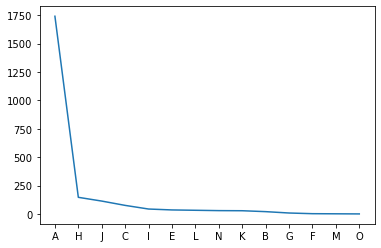

In [30]:
# 대다수의 자격 유형이 A에 몰려있고 O가 가장 적다.
plt.plot(df['자격유형'].value_counts())

### 임대보증금 분석

In [31]:
# max값이 너무 눈에 띄게 비싼것을 확인
fred10 = df['임대보증금']
pd.set_option('display.float_format', lambda x: '%.3f' % x)
fred10.describe()

count        2285.000
mean     26510316.061
std      19274927.983
min       3056000.000
25%      14555000.000
50%      21027000.000
75%      32459000.000
max     194080000.000
Name: 임대보증금, dtype: float64

In [32]:
# 많은 집이 높은 가격대가 챙정된것을 확인 어떤 공통점이 있는지 확인
fred10_max_sort = fred10.sort_values(ascending=False)

In [33]:
fred10_df = df
fred10_df = df.sort_values(by=['임대보증금'],ascending=False)
fred10_df.head(30)
# 대부분의 건물이 서울과 경기도에 몰려있는 것을 확인할 수 있고 그 이외의 것은 정확히 알지 못하겠다.

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1408,C2357,533,아파트,부산광역시,국민임대,51.300,165,25.000,E,194080000.000,101080.000,1.000,2.000,484.000,345.000
1343,C1344,424,아파트,서울특별시,공공임대(분납),84.970,42,0.000,A,145264000.000,368190.000,0.000,3.000,467.000,509.000
1401,C1328,992,아파트,경기도,국민임대,51.750,128,36.000,E,144496000.000,75250.000,0.000,15.000,871.000,770.000
1402,C1328,992,아파트,경기도,국민임대,51.750,32,36.000,E,144496000.000,75250.000,0.000,15.000,871.000,770.000
1342,C1344,424,아파트,서울특별시,공공임대(분납),84.950,39,0.000,A,143545000.000,363840.000,0.000,3.000,467.000,509.000
1344,C1344,424,아파트,서울특별시,공공임대(분납),84.990,100,0.000,A,142744000.000,361800.000,0.000,3.000,467.000,509.000
1730,C1136,984,아파트,경기도,국민임대,51.760,164,31.000,E,139418000.000,72610.000,0.000,19.000,865.000,763.000
1565,C2085,969,아파트,서울특별시,공공임대(분납),84.390,314,0.000,A,136646000.000,332510.000,0.000,3.000,1590.000,1595.000
1566,C2085,969,아파트,서울특별시,공공임대(분납),84.390,4,0.000,A,136628000.000,332460.000,0.000,3.000,1590.000,1595.000
1564,C2085,969,아파트,서울특별시,공공임대(분납),84.050,4,0.000,A,135531000.000,329790.000,0.000,3.000,1590.000,1595.000


In [34]:
# 평균보다 적은 돈을 임대보증금을 내는 가구는 1507가구이다.

fred10_mean = fred10 < 26510316.061
fred10_mean = fred10[fred10_mean]
fred10_mean.shape

(1507,)

### 임대료 분석

In [35]:
# 평균적인 임대료를 내고 있는 가구는 약 1470가구 정도 된다. 
fred11 = df['임대료']
fred11_mean_down = fred11 <= 196810.359
fred11_mean_down = df[fred11_mean_down]
fred11_mean_down

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.720,134,38.000,A,15667000.000,103680.000,0.000,3.000,1425.000,1015.000
1,C2483,900,아파트,경상북도,국민임대,39.720,15,38.000,A,15667000.000,103680.000,0.000,3.000,1425.000,1015.000
2,C2483,900,아파트,경상북도,국민임대,51.930,385,38.000,A,27304000.000,184330.000,0.000,3.000,1425.000,1015.000
3,C2483,900,아파트,경상북도,국민임대,51.930,15,38.000,A,27304000.000,184330.000,0.000,3.000,1425.000,1015.000
4,C2483,900,아파트,경상북도,국민임대,51.930,41,38.000,A,27304000.000,184330.000,0.000,3.000,1425.000,1015.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,C2532,239,아파트,강원도,국민임대,49.200,19,7.000,A,11346000.000,116090.000,0.000,1.000,166.000,146.000
2281,C2532,239,아파트,강원도,국민임대,51.080,34,7.000,A,14005000.000,142310.000,0.000,1.000,166.000,146.000
2282,C2532,239,아파트,강원도,국민임대,51.730,34,7.000,A,14005000.000,142310.000,0.000,1.000,166.000,146.000
2283,C2532,239,아파트,강원도,국민임대,51.960,114,7.000,A,14005000.000,142310.000,0.000,1.000,166.000,146.000


In [36]:
df.head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.720,134,38.000,A,15667000.000,103680.000,0.000,3.000,1425.000,1015.000
1,C2483,900,아파트,경상북도,국민임대,39.720,15,38.000,A,15667000.000,103680.000,0.000,3.000,1425.000,1015.000
2,C2483,900,아파트,경상북도,국민임대,51.930,385,38.000,A,27304000.000,184330.000,0.000,3.000,1425.000,1015.000


### 도보 10분거리 내 지라철역 수 (환승노선 수 반영)

In [64]:
fred12 = df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts()
df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].describe()
# 압도적으로 지하철역 인근 지역의 아파트가 적다.
fred12


0.000    2016
1.000     230
2.000      33
3.000       6
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

### 도보 10분거리 내 버스 정류장 수 분석

In [94]:
fred13 = df['도보 10분거리 내 버스정류장 수']
fred13.value_counts()
fred13.describe()
# 전국적으로 버스가 훨씬 많이 활성화 되어 있기 때문에 많은 count가 있고 상위 30개를 출력하고 확인
fred13 = fred13.sort_values(ascending=False)
fred13_idx = fred13.index
df_fred13 = df.iloc[fred13_idx]
df_fred13_group = df_fred13['도보 10분거리 내 버스정류장 수'].groupby(df_fred13['단지코드'])
df_fred13_group.mean().sort_value

AttributeError: 'Series' object has no attribute 'sort_value'